# Data Cleaning and EDA with Time Series Data - Zain Ali 
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/9d/r4wkb8dj54b5k6_vd_8stbq00000gn/T/ipykernel_65313/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/var/folders/9d/r4wkb8dj54b5k6_vd_8stbq00000gn/T/ipykernel_65313/43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [8]:
#create your Datetime column
df['Datetime'] = df['Date']+" "+df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])

/var/folders/9d/r4wkb8dj54b5k6_vd_8stbq00000gn/T/ipykernel_65313/1107038790.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


In [9]:
#convert all data columns to numeric types
for column in df.columns:
    if column not in ['Date', 'Time', 'Datetime']:
        df[column] = pd.to_numeric(df[column],  errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [12]:
df.Date[0]

datetime.date(2006, 12, 16)

In [13]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [14]:
#use datetime_is_numeric = True to get statistics on the datetime column
# I removed datetime_is_numeric = True, was running into `TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'`

desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

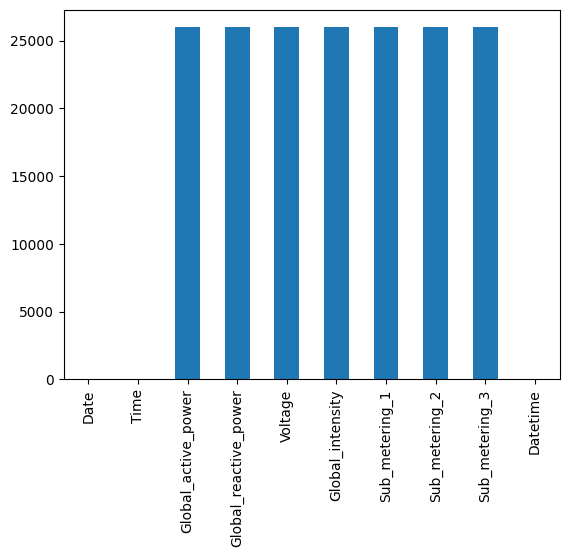

In [15]:
df.isna().sum().plot.bar()

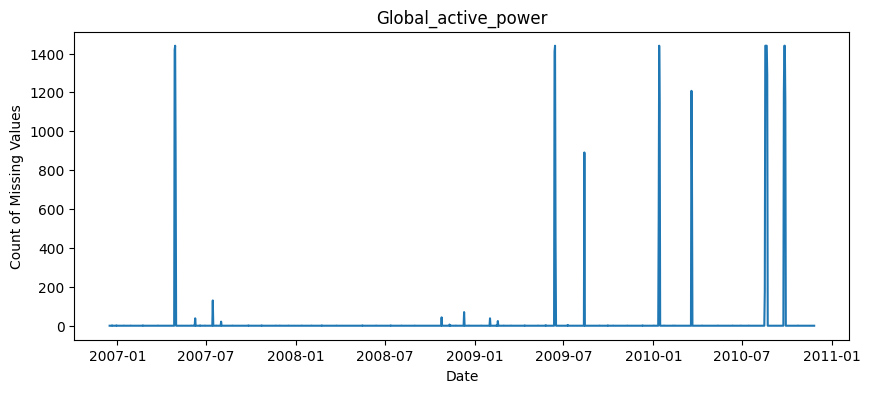

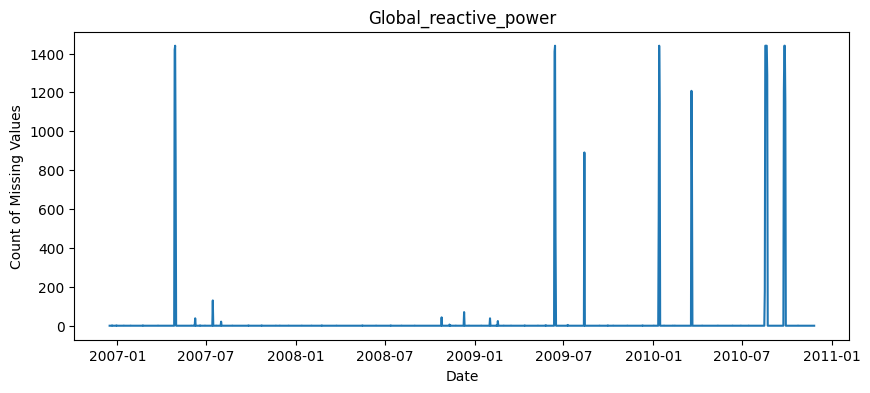

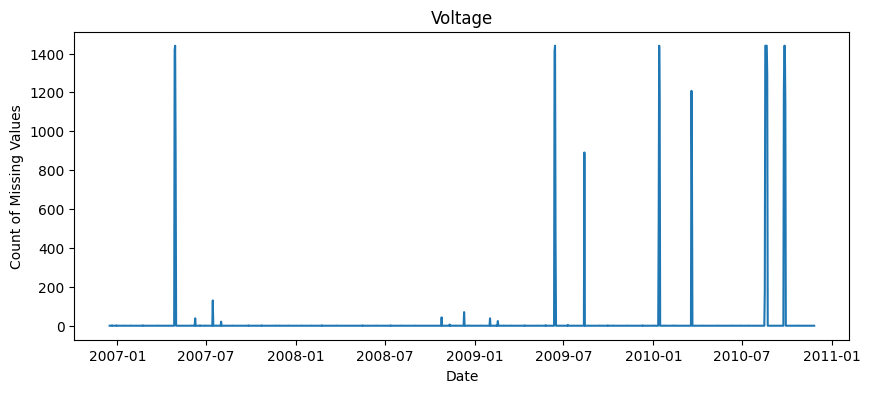

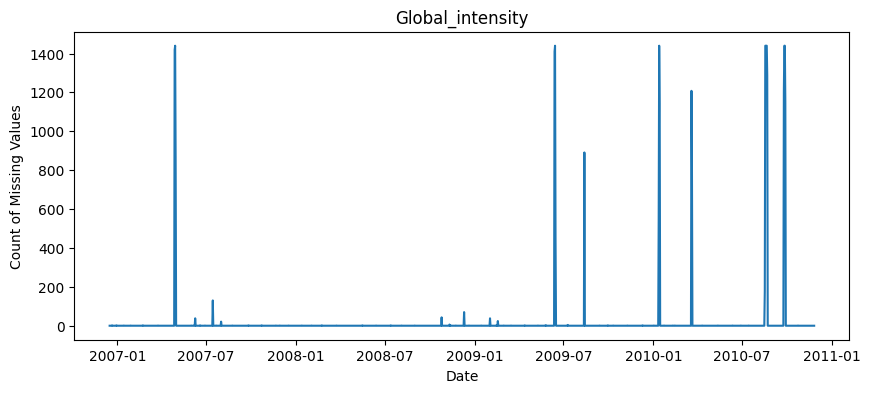

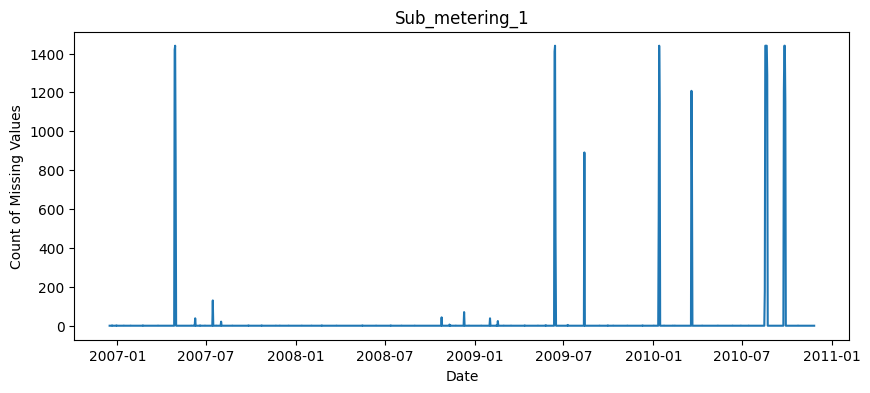

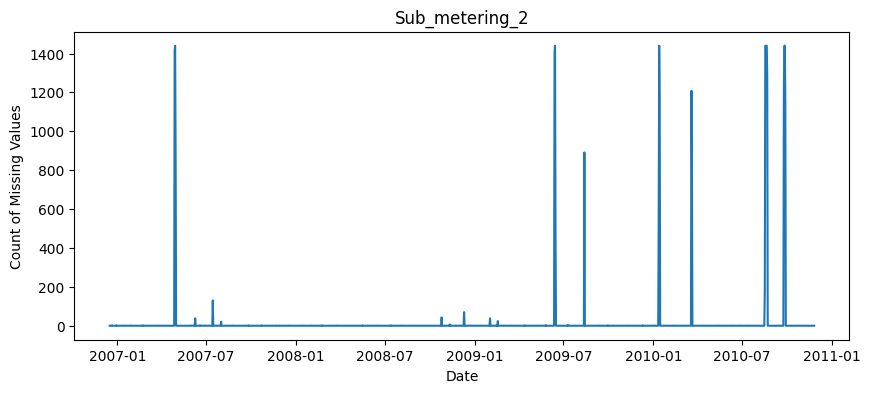

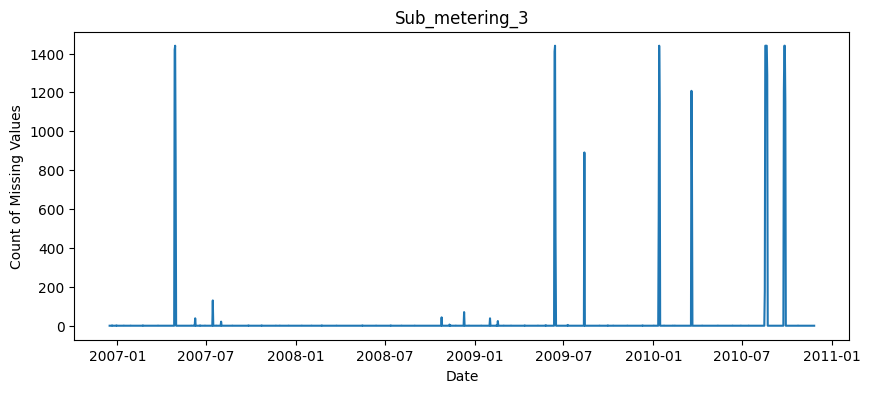

In [16]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
# Commenting below line, as the visuals are not enough in understanding
# df_na.plot('Date', df_na.columns[3:-1])


for column in df_na.columns[2:-1]:  
    plt.figure(figsize=(10, 4))  
    plt.plot(df_na['Date'], df_na[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Count of Missing Values')
    plt.show()

In [17]:
# Furture Analysis
include_columns = df.columns.difference(['Date', 'Time', 'Datetime'])
count_rows_all_missing = df[include_columns].isna().all(axis=1).sum()
print("Number of rows with all data missing:", count_rows_all_missing)

percentage_all_missing = (count_rows_all_missing / len(df)) * 100
print("Percentage of rows with all data missing: {:.2f}%".format(percentage_all_missing))


Number of rows with all data missing: 25979
Percentage of rows with all data missing: 1.25%


**Q: What do you notice about the pattern of missing data?**

A: Alot of missing data is uniformly distributed across all columns, each exhibiting comparable levels of missing values.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Row Deletion for rows where all data is missing in all the columns (1.25% of the dataset) and Mean Imputation for columns with partial missing data, balancing simplicity and data integrity.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [18]:
#clean up missing data here
# Remove rows where all elements are missing
df_cleaned = df.dropna(how='all')

# Apply mean imputation for columns with missing data
for column in df_cleaned.columns:
    if df_cleaned[column].isna().any(): 
        df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)

/var/folders/9d/r4wkb8dj54b5k6_vd_8stbq00000gn/T/ipykernel_65313/953106448.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)


In [19]:
#use datetime_is_numeric = True to get statistics on the datetime column
# I removed datetime_is_numeric = True, was running into `TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'`
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I chose Global Active Power, Global Reactive Power, Voltage, and Global Intensity for their collective ability to offer a detailed view of household energy usage. Global Active Power is central to understanding overall consumption patterns, while Global Reactive Power gives insight into power quality and efficiency. Voltage variation is key to assessing the stability of the electrical supply, and Global Intensity helps in correlating the intensity of electricity use with consumption. Together, these variables help in analyzing energy management and optimizing usage within the household.

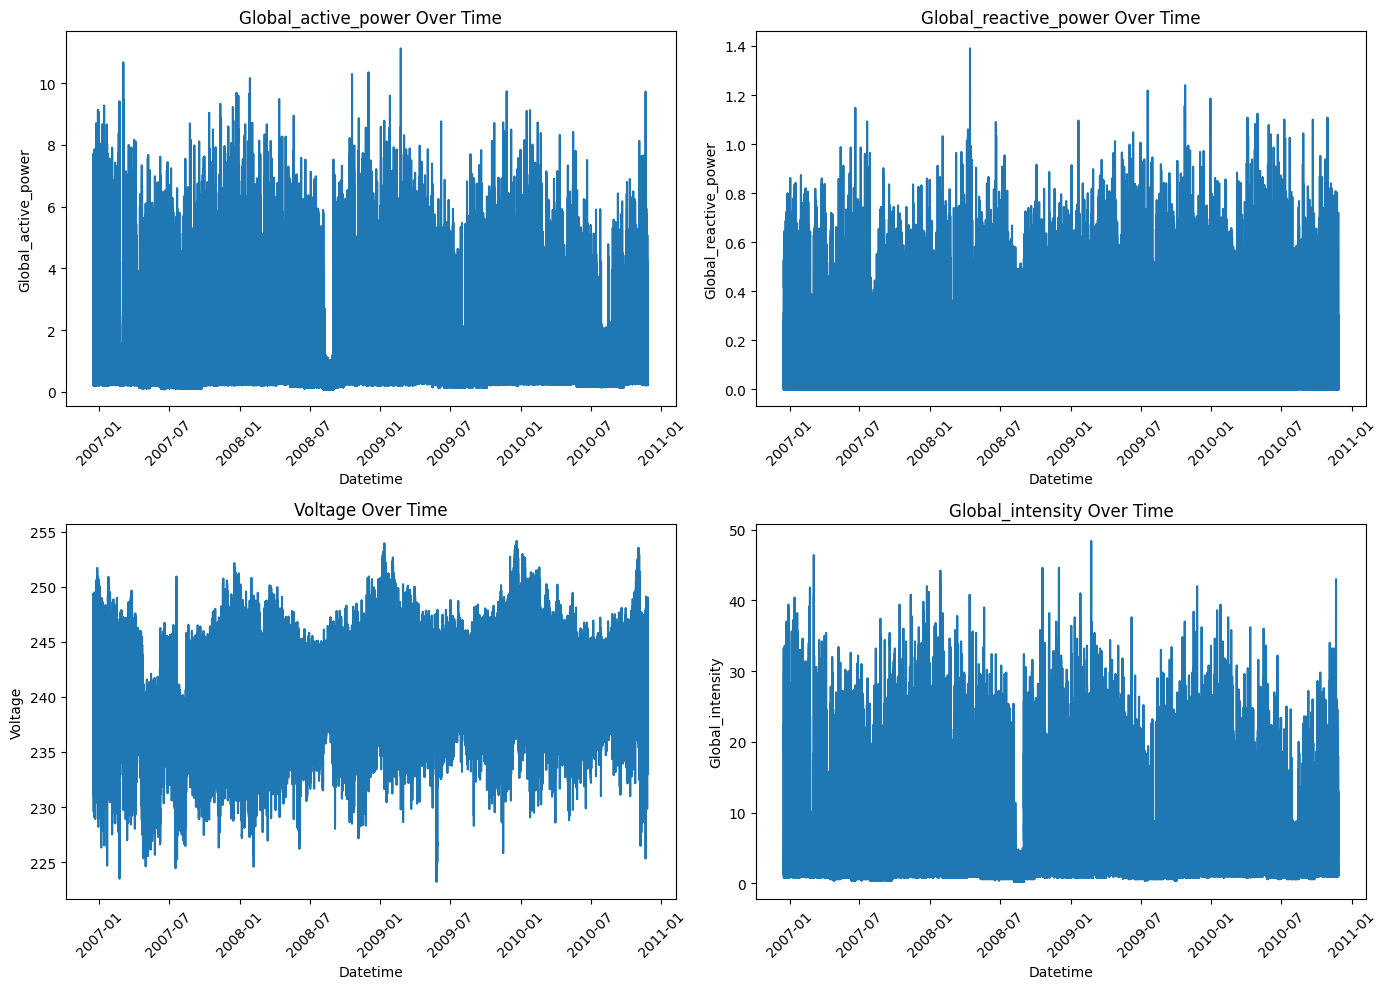

In [20]:
#build your line chart here

variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

plt.figure(figsize=(14, 10))

for i, variable in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df['Datetime'], df[variable])
    plt.title(f'{variable} Over Time')
    plt.xlabel('Datetime')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
      
plt.tight_layout()
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The raw data visualization is too cluttered, making it not too useful in identifying any trends. The only one that does have some pattern is voltage, which seems to be following a sin curve with peak and slow seasons. 

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [21]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

df.set_index('Datetime', inplace=True)
df_filtered = df[variables]
monthly_avg = df_filtered.groupby(pd.Grouper(freq='M')).mean() 

/var/folders/9d/r4wkb8dj54b5k6_vd_8stbq00000gn/T/ipykernel_65313/2936457793.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_filtered.groupby(pd.Grouper(freq='M')).mean()


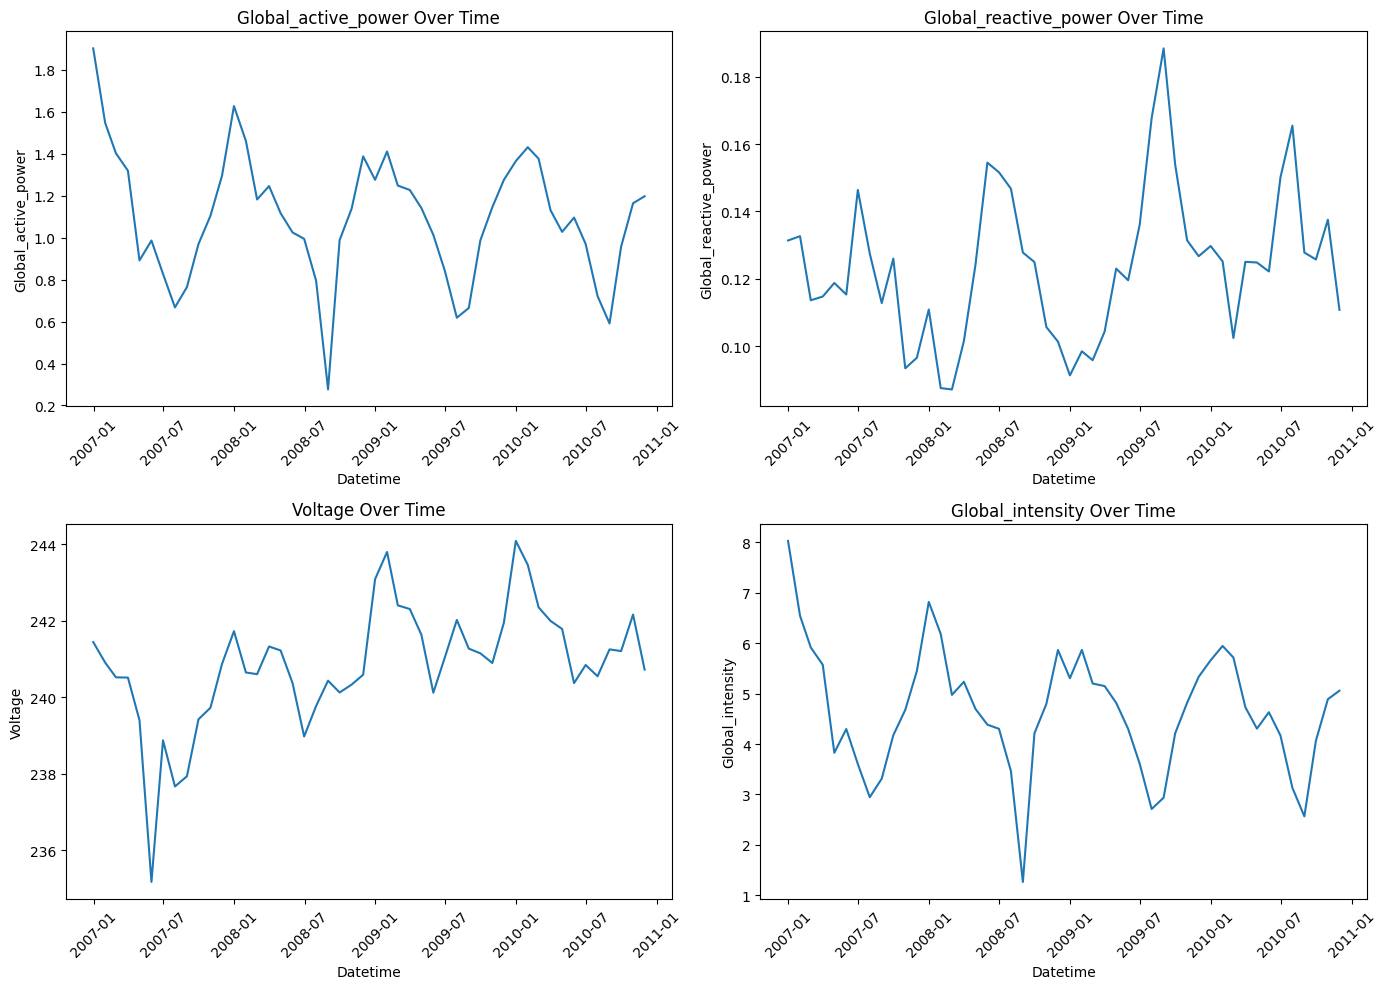

In [22]:
#build your linechart here
plt.figure(figsize=(14, 10))

for i, variable in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(monthly_avg.index, monthly_avg[variable])
    plt.title(f'{variable} Over Time')
    plt.xlabel('Datetime')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  

plt.tight_layout() 
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The monthly data shows a clear cyclical trend in Global Active Power, suggesting seasonal effects on energy usage, and a similar pattern is evident in Global Intensity, indicating they likely move in tandem as both relate to power usage. Global Reactive Power exhibits variability, though less distinct, which could be influenced by various household activities. Voltage remains relatively stable with minor fluctuations, reflecting a consistent supply. 

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [23]:
#compute your moving average here
rolling_avg = df_filtered.rolling(window=30 * 24 * 60, min_periods=1).mean()


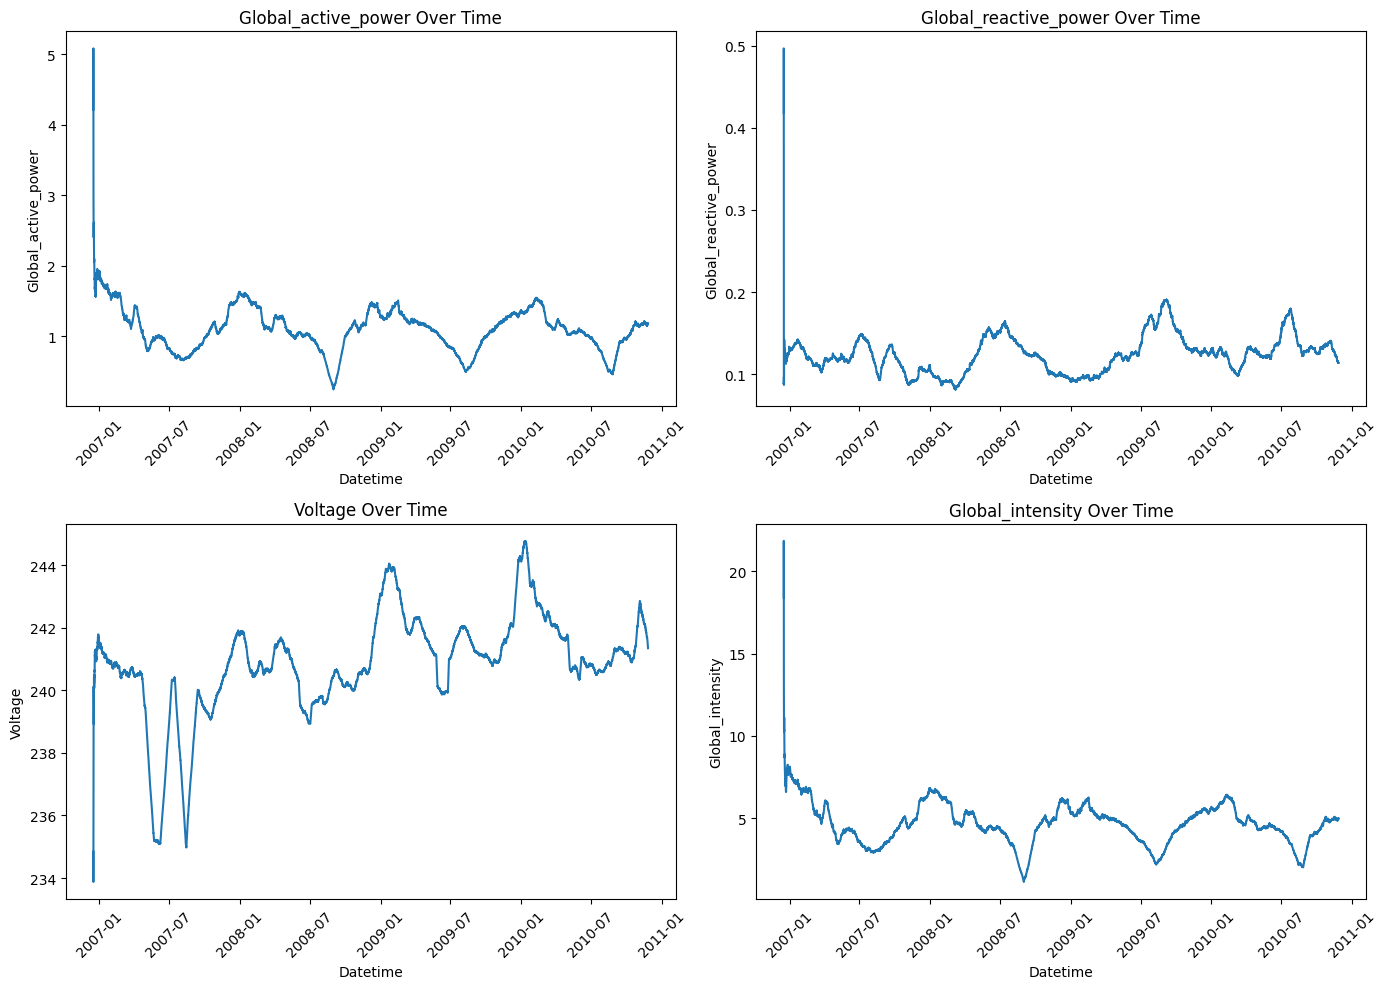

In [24]:
#build your linechart here
plt.figure(figsize=(14, 10))

for i, variable in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(rolling_avg.index, rolling_avg[variable])
    plt.title(f'{variable} Over Time')
    plt.xlabel('Datetime')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  

plt.tight_layout() 
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: Moving average is more abrupting. The moving average is more effective for visualizing this data as it provides a smoother trend line that helps in identifying underlying patterns without the abrupt changes. 

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

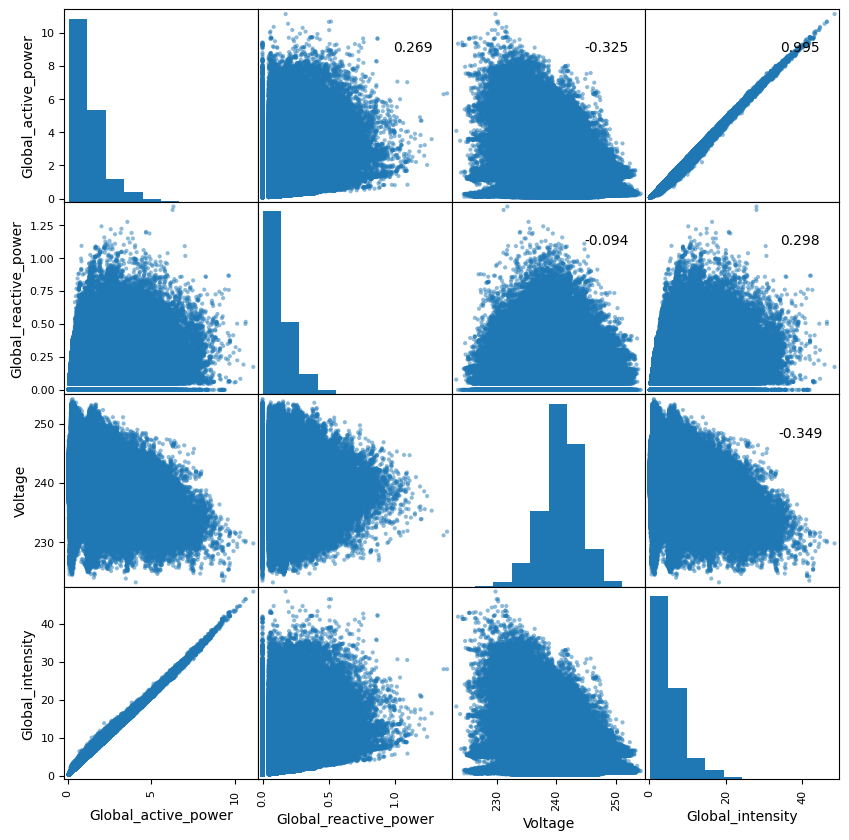

In [25]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The data shows a strong correlation between Global Active Power and Global Intensity, indicating that they are directly related and could predict each other. The weak correlations between Global Reactive Power, Voltage, and other variables suggest they are less predictive. When using this data in downstream, the strong correlation seems to be a great choice to add resources to, while weak correlations may not be helpful as predictors.